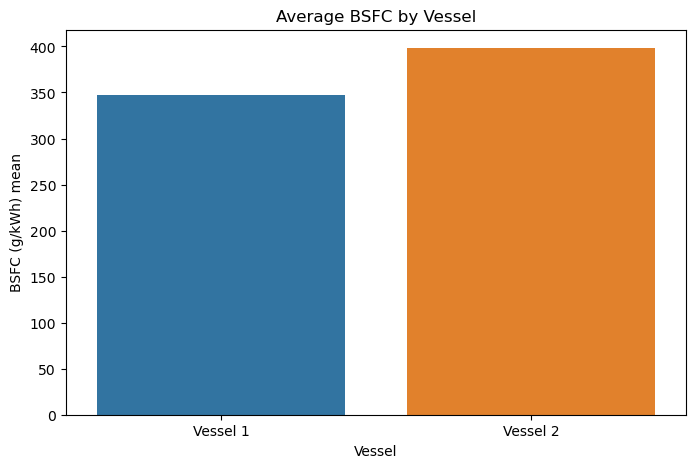

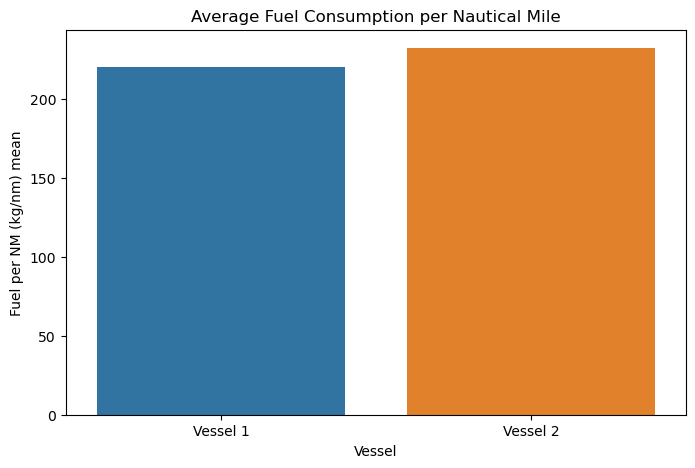

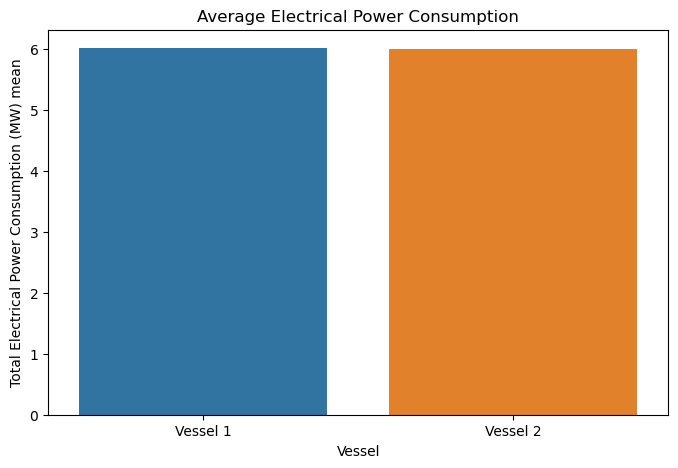


KPI Summary by Vessel:
Vessel Name  BSFC (g/kWh) mean  BSFC (g/kWh) std  Fuel per NM (kg/nm) mean  Fuel per NM (kg/nm) std  Total Electrical Power Consumption (MW) mean  Total Electrical Power Consumption (MW) std
   Vessel 1             347.32            130.48                    219.96                    63.18                                          6.02                                         1.40
   Vessel 2             398.26            172.53                    231.96                    71.81                                          6.01                                         1.59


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Setup project paths
PROJECT_ROOT = r"C:\Users\nirma\Cruise_ship_Perfomance"
sys.path.append(PROJECT_ROOT)

from src.data.loader import load_data
from src.features.engineering import engineer_features
from src.analysis.efficiency import calculate_bsfc, calculate_fuel_per_nm
from src.visualization.plotting import plot_kpi_comparison

# Load and process data
DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'processed', 'cleaned_data.csv')
FIGURES_PATH = os.path.join(PROJECT_ROOT, 'reports', 'figures')

# Load and process data
df = load_data(DATA_PATH)
df = engineer_features(df)
df['BSFC (g/kWh)'] = calculate_bsfc(df)
df['Fuel per NM (kg/nm)'] = calculate_fuel_per_nm(df)

# Calculate average KPIs
kpis = df.groupby('Vessel Name').agg({
    'BSFC (g/kWh)': ['mean', 'std'],
    'Fuel per NM (kg/nm)': ['mean', 'std'],
    'Total Electrical Power Consumption (MW)': ['mean', 'std']
}).round(2)

# Flatten column names
kpis.columns = [f'{col[0]} {col[1]}'.strip() for col in kpis.columns]
kpis = kpis.reset_index()

# Plot KPI comparisons
plot_kpi_comparison(
    kpis, 
    'BSFC (g/kWh) mean',
    'Average BSFC by Vessel',
    os.path.join(FIGURES_PATH, 'bsfc_comparison.png')
)

plot_kpi_comparison(
    kpis, 
    'Fuel per NM (kg/nm) mean',
    'Average Fuel Consumption per Nautical Mile',
    os.path.join(FIGURES_PATH, 'fuel_per_nm_comparison.png')
)

plot_kpi_comparison(
    kpis, 
    'Total Electrical Power Consumption (MW) mean',
    'Average Electrical Power Consumption',
    os.path.join(FIGURES_PATH, 'electrical_power_comparison.png')
)

# Display KPI table
print("\nKPI Summary by Vessel:")
print(kpis.to_string(index=False))